In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import misc as smi
import numpy as np
import pandas as pd
import os
from sklearn.utils import shuffle
from sklearn.neural_network import MLPRegressor
import math
from PIL import Image

In [2]:
#train_df = pd.read_csv('training.csv',usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29],index_col = False, header = 0)
#Read the kaggle training dataset
train_df = pd.read_csv('/Users/jun/Downloads/training.csv',index_col =False,header=0)

In [3]:
list(train_df)
train_df['Image'].head

<bound method NDFrame.head of 0       238 236 237 238 240 240 239 241 241 243 240 23...
1       219 215 204 196 204 211 212 200 180 168 178 19...
2       144 142 159 180 188 188 184 180 167 132 84 59 ...
3       193 192 193 194 194 194 193 192 168 111 50 12 ...
4       147 148 160 196 215 214 216 217 219 220 206 18...
5       167 169 170 167 156 145 106 68 52 24 20 15 21 ...
6       109 109 125 141 145 139 120 81 45 34 31 35 36 ...
7       178 177 178 179 179 179 181 185 188 184 192 20...
8       164 158 118 76 66 69 59 53 43 31 35 41 45 55 6...
9       226 227 225 224 221 220 215 210 210 208 206 18...
10      52 51 54 57 57 56 55 55 56 59 62 66 67 72 79 8...
11      142 124 123 133 140 147 151 147 137 136 125 12...
12      86 93 106 114 112 110 111 113 138 147 148 132 ...
13      75 65 63 75 70 78 84 97 106 71 39 25 23 21 18 ...
14      119 106 101 106 89 66 67 72 85 112 118 109 96 ...
15      52 54 74 76 55 48 47 41 38 37 34 33 33 31 30 3...
16      201 200 202 193 124 59 53 50 48 56

In [4]:
##Currently Image is a string. Split and convert to numeric
train_df['Image'] = train_df['Image'].apply(lambda im: np.fromstring(im, sep=' '))
train_df['Image']

0       [238.0, 236.0, 237.0, 238.0, 240.0, 240.0, 239...
1       [219.0, 215.0, 204.0, 196.0, 204.0, 211.0, 212...
2       [144.0, 142.0, 159.0, 180.0, 188.0, 188.0, 184...
3       [193.0, 192.0, 193.0, 194.0, 194.0, 194.0, 193...
4       [147.0, 148.0, 160.0, 196.0, 215.0, 214.0, 216...
5       [167.0, 169.0, 170.0, 167.0, 156.0, 145.0, 106...
6       [109.0, 109.0, 125.0, 141.0, 145.0, 139.0, 120...
7       [178.0, 177.0, 178.0, 179.0, 179.0, 179.0, 181...
8       [164.0, 158.0, 118.0, 76.0, 66.0, 69.0, 59.0, ...
9       [226.0, 227.0, 225.0, 224.0, 221.0, 220.0, 215...
10      [52.0, 51.0, 54.0, 57.0, 57.0, 56.0, 55.0, 55....
11      [142.0, 124.0, 123.0, 133.0, 140.0, 147.0, 151...
12      [86.0, 93.0, 106.0, 114.0, 112.0, 110.0, 111.0...
13      [75.0, 65.0, 63.0, 75.0, 70.0, 78.0, 84.0, 97....
14      [119.0, 106.0, 101.0, 106.0, 89.0, 66.0, 67.0,...
15      [52.0, 54.0, 74.0, 76.0, 55.0, 48.0, 47.0, 41....
16      [201.0, 200.0, 202.0, 193.0, 124.0, 59.0, 53.0...
17      [202.0

In [5]:
#im_train = pd.read_csv('training.csv',usecols=[30],index_col = False, header = 0)
#train_df['Image']

In [6]:
cols=None
if cols:  # get a subset of columns
    train_df = train_df[list(cols) + ['Image']]

In [7]:
print(train_df.count()) 

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [8]:
#Drop columns that dont have all the columns populated 
train_df = train_df.dropna()

In [9]:
train_df.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [10]:
#Save only image data as X and normalize the pixel data
X = np.vstack(train_df['Image'].values) / 255.  # scale pixel values to [0, 1]
#X = np.vstack(train_df['Image'].values)  # scale pixel values to [0, 1]
X = X.astype(np.float32)

(2140, 31)

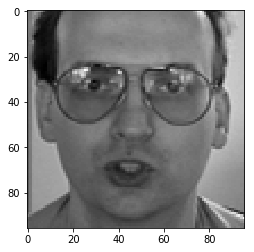

In [48]:
#Plot to validate the image
plt.imshow(X[6].reshape((96,96)), cmap = 'gray')
train_df.shape
#plt.imshow(test_image.reshape((96,96)), cmap = 'gray')


In [12]:
#Save y as the 15 landmarks (30 points)
y = train_df[train_df.columns[:-1]].values
#y = (y - 48) / 48  # scale target coordinates to [-1, 1]
#X, y = shuffle(X, y, random_state=42)  # shuffle train data
y = y.astype(np.float32)
y

array([[ 66.03356171,  39.00227356,  30.22700691, ...,  72.93545532,
         43.13070679,  84.48577118],
       [ 64.33293915,  34.97007751,  29.94927597, ...,  70.26655579,
         45.46791458,  85.4801712 ],
       [ 65.05705261,  34.90964127,  30.90378952, ...,  70.19178772,
         47.27494812,  78.65937042],
       ..., 
       [ 68.43087006,  38.65197372,  28.89585686, ...,  79.04312897,
         47.17673874,  89.54452515],
       [ 64.1521759 ,  30.69159126,  27.00089836, ...,  79.30142975,
         58.61108398,  80.35554504],
       [ 66.68375397,  34.48342896,  30.78449059, ...,  75.96359253,
         52.92337036,  82.66106415]], dtype=float32)

In [13]:
train_df[train_df.columns[:-1]].values.shape

(2140, 30)

In [14]:
(y[0,:])

array([ 66.03356171,  39.00227356,  30.22700691,  36.42167664,
        59.58207703,  39.64742279,  73.13034821,  39.96999741,
        36.3565712 ,  37.38940048,  23.45287132,  37.38940048,
        56.95326233,  29.03364754,  80.22712708,  32.22813797,
        40.22760773,  29.00232124,  16.35637856,  29.64747047,
        44.42057037,  57.06680298,  61.19530869,  79.97016907,
        28.61449623,  77.38899231,  43.312603  ,  72.93545532,
        43.13070679,  84.48577118], dtype=float32)

In [15]:
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(X.shape, X.min(), X.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(y.shape, y.min(), y.max()))

X.shape == (2140, 9216); X.min == 0.000; X.max == 1.000
y.shape == (2140, 30); y.min == 3.826; y.max == 95.809


In [16]:
# Use sklearn NN  having 2 hidden layers of 30 nodes. Need to modify layer counts and nodes in each layer and compute RMSE to determine best model

nn = MLPRegressor((30,30))

In [17]:
#Fit the model on training data
nn.fit(X,y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [68]:
#Currently predicting on training data itself. Need to use test dataset here
nn.predict(X[0:2]).shape
X[0:2].shape

(2, 9216)

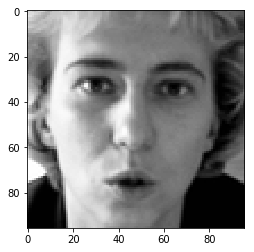

In [33]:
#Plotttig image with 2 points to verify
#im = plt.imread(image_name)
implot = plt.imshow(X[1].reshape((96,96)), cmap = 'gray')

# # put a blue dot at (10, 20)
# plt.scatter([90.62], [52.24],[44],[50.27])

# put a red dot, size 40, at 2 locations:
#plt.scatter(x=dat.iloc[1,12], y=dat.iloc[1,13], c='r', s=40)


#plt.show()

In [20]:
#copying data for different use
dat = y.copy()

In [21]:
#converting array into dataframe with same column name
dat = pd.DataFrame(dat)
dat.columns = list(train_df.columns[:-1])

In [22]:
#creating new dataframe for making coordinate value into tuple
dat_coordi = pd.DataFrame(np.random.rand(2140,15))

                          
for i in range(0,15):
    dat_coordi.iloc[:,i] = dat.iloc[:,i*2:i*2+2].apply(tuple, axis=1)

In [23]:
#renaming coordinate dataframe's columns
dat_coordi.columns=[
    'left_eye_center', 
    'right_eye_center',
    'left_eye_inner_corner',
    'left_eye_outer_corner',
    'right_eye_inner_corner',
    'right_eye_outer_corner',
    'left_eyebrow_inner_end',
    'left_eyebrow_outer_end',
    'right_eyebrow_inner_end',
    'right_eyebrow_outer_end',
    'nose_tip',
    'mouth_left_corner', 
    'mouth_right_corner',
    'mouth_center_top_lip',
    'mouth_center_bottom_lip']

In [24]:
dat_coordi.head()

,left_eye_center,right_eye_center,left_eye_inner_corner,left_eye_outer_corner,right_eye_inner_corner,right_eye_outer_corner,left_eyebrow_inner_end,left_eyebrow_outer_end,right_eyebrow_inner_end,right_eyebrow_outer_end,nose_tip,mouth_left_corner,mouth_right_corner,mouth_center_top_lip,mouth_center_bottom_lip
0,"(66.03356170654297, 39.00227355957031)","(30.227006912231445, 36.42167663574219)","(59.58207702636719, 39.647422790527344)","(73.1303482055664, 39.96999740600586)","(36.356571197509766, 37.389400482177734)","(23.452871322631836, 37.389400482177734)","(56.95326232910156, 29.033647537231445)","(80.22712707519531, 32.2281379699707)","(40.22760772705078, 29.002321243286133)","(16.35637855529785, 29.647470474243164)","(44.420570373535156, 57.066802978515625)","(61.195308685302734, 79.97016906738281)","(28.6144962310791, 77.38899230957031)","(43.31260299682617, 72.93545532226562)","(43.130706787109375, 84.48577117919922)"
1,"(64.33293914794922, 34.97007751464844)","(29.949275970458984, 33.44871520996094)","(58.856170654296875, 35.274349212646484)","(70.72272491455078, 36.187164306640625)","(36.034725189208984, 34.36153030395508)","(24.472511291503906, 33.14444351196289)","(53.987403869628906, 28.275949478149414)","(78.63421630859375, 30.40592384338379)","(42.728851318359375, 26.146041870117188)","(16.8653621673584, 27.05885887145996)","(48.206298828125, 55.66093444824219)","(56.42144775390625, 76.35199737548828)","(35.12238311767578, 76.04766082763672)","(46.68459701538086, 70.26655578613281)","(45.46791458129883, 85.48017120361328)"
2,"(65.05705261230469, 34.90964126586914)","(30.903789520263672, 34.90964126586914)","(59.4119987487793, 36.32096862792969)","(70.98442077636719, 36.32096862792969)","(37.678104400634766, 36.32096862792969)","(24.976421356201172, 36.60322189331055)","(55.74252700805664, 27.570947647094727)","(78.88736724853516, 32.6516227722168)","(42.19389343261719, 28.135452270507812)","(16.79115867614746, 32.08711624145508)","(47.5572624206543, 53.53894805908203)","(60.82294845581055, 73.01431274414062)","(33.726314544677734, 72.73200225830078)","(47.27494812011719, 70.19178771972656)","(47.27494812011719, 78.65937042236328)"
3,"(65.22573852539062, 37.26177215576172)","(32.023094177246094, 37.26177215576172)","(60.00333786010742, 39.12717819213867)","(72.31471252441406, 38.38096618652344)","(37.61864471435547, 38.75411605834961)","(25.307270050048828, 38.007904052734375)","(56.433807373046875, 30.92986488342285)","(77.91026306152344, 31.665725708007812)","(41.671512603759766, 31.049989700317383)","(20.458017349243164, 29.90934181213379)","(51.88507843017578, 54.16653823852539)","(65.59888458251953, 72.70372009277344)","(37.2454948425293, 74.19548034667969)","(50.303165435791016, 70.09169006347656)","(51.56118392944336, 78.26837921142578)"
4,"(66.72530364990234, 39.62126159667969)","(32.244808197021484, 38.042030334472656)","(58.56589126586914, 39.62126159667969)","(72.51593017578125, 39.88446807861328)","(36.98237991333008, 39.094852447509766)","(22.50611114501953, 38.30523681640625)","(57.249568939208984, 30.672176361083984)","(77.76294708251953, 31.737247467041016)","(38.03543472290039, 30.935380935668945)","(15.925869941711426, 30.672176361083984)","(43.29953384399414, 64.88951873779297)","(60.671409606933594, 77.52323913574219)","(31.191755294799805, 76.99729919433594)","(44.96274948120117, 73.70738983154297)","(44.227142333984375, 86.87116241455078)"


In [25]:
#creating functiong for getting distance. argument is list of two tuples of coordinates to be calculated
def getDistance(coordi):
    return math.hypot(coordi[0][0]-coordi[1][0],coordi[0][1]-coordi[1][1])

In [26]:
#creating a dataframe which will store distance value
dat_distance = pd.DataFrame(np.random.rand(2140,12))

In [27]:
#remane column with labels of 12 targeted distances 
dat_distance.columns = [
    'inner_eyebrow_dstnc',
    'outer_eyebrow_dstnc',
    'inner_eye_dstnc',
    'eye_center_dstnc',
    'outer_eye_dstnc',
    'left_eye_dstnc',
    'right_eye_dstnc',
    'left_eye_nose_dstnc',
    'right_eye_nose_dstnc',
    'nose_lip_dstnc',
    'lip_vertical_dstnc',
    'lip_horizon_dstnc'
]

In [28]:
dat_distance.head()

,inner_eyebrow_dstnc,outer_eyebrow_dstnc,inner_eye_dstnc,eye_center_dstnc,outer_eye_dstnc,left_eye_dstnc,right_eye_dstnc,left_eye_nose_dstnc,right_eye_nose_dstnc,nose_lip_dstnc,lip_vertical_dstnc,lip_horizon_dstnc
0,0.189866,0.123178,0.650378,0.589802,0.400287,0.755490,0.006872,0.998116,0.102238,0.043152,0.701881,0.360021
1,0.457496,0.524767,0.304483,0.947820,0.869718,0.053660,0.075625,0.185529,0.645235,0.063200,0.650623,0.619489
2,0.588932,0.098134,0.035489,0.920753,0.968601,0.101025,0.608629,0.175577,0.048604,0.942114,0.964969,0.454184
3,0.982879,0.630704,0.938876,0.968470,0.382790,0.012561,0.206538,0.042964,0.809649,0.521417,0.265235,0.867316
4,0.880464,0.080460,0.754965,0.650808,0.827080,0.052982,0.367331,0.075212,0.565998,0.266863,0.455466,0.006777


In [29]:
# creating a dataframe which will store a list of two tuples of coordinates for each of 12 targeted distances
dat_distance_coordi = pd.DataFrame(np.random.rand(2140,12))
dat_distance_coordi.columns = dat_distance.columns
dat_distance_coordi['inner_eyebrow_dstnc'] = list(zip(dat_coordi['left_eyebrow_inner_end'],dat_coordi['right_eyebrow_inner_end']))
dat_distance_coordi['outer_eyebrow_dstnc']=list(zip(dat_coordi['left_eyebrow_outer_end'],dat_coordi['right_eyebrow_outer_end']))
dat_distance_coordi['inner_eye_dstnc'] = list(zip(dat_coordi['left_eye_inner_corner'],dat_coordi['right_eye_inner_corner']))
dat_distance_coordi['eye_center_dstnc']=list(zip(dat_coordi['left_eye_center'],dat_coordi['right_eye_center']))
dat_distance_coordi['outer_eye_dstnc']=list(zip(dat_coordi['left_eye_outer_corner'],dat_coordi['right_eye_outer_corner']))
dat_distance_coordi['left_eye_dstnc']=list(zip(dat_coordi['left_eye_inner_corner'],dat_coordi['left_eye_outer_corner']))
dat_distance_coordi['right_eye_dstnc']=list(zip(dat_coordi['right_eye_inner_corner'],dat_coordi['right_eye_outer_corner']))
dat_distance_coordi['left_eye_nose_dstnc']=list(zip(dat_coordi['left_eye_center'],dat_coordi['nose_tip']))
dat_distance_coordi['right_eye_nose_dstnc']=list(zip(dat_coordi['right_eye_center'],dat_coordi['nose_tip']))
dat_distance_coordi['nose_lip_dstnc']=list(zip(dat_coordi['nose_tip'],dat_coordi['mouth_center_top_lip']))
dat_distance_coordi['lip_vertical_dstnc']=list(zip(dat_coordi['mouth_center_top_lip'],dat_coordi['mouth_center_bottom_lip']))
dat_distance_coordi['lip_horizon_dstnc']=list(zip(dat_coordi['mouth_left_corner'],dat_coordi['mouth_right_corner']))

In [30]:
dat_distance_coordi

,inner_eyebrow_dstnc,outer_eyebrow_dstnc,inner_eye_dstnc,eye_center_dstnc,outer_eye_dstnc,left_eye_dstnc,right_eye_dstnc,left_eye_nose_dstnc,right_eye_nose_dstnc,nose_lip_dstnc,lip_vertical_dstnc,lip_horizon_dstnc
0,"((56.95326232910156, 29.033647537231445), (40....","((80.22712707519531, 32.2281379699707), (16.35...","((59.58207702636719, 39.647422790527344), (36....","((66.03356170654297, 39.00227355957031), (30.2...","((73.1303482055664, 39.96999740600586), (23.45...","((59.58207702636719, 39.647422790527344), (73....","((36.356571197509766, 37.389400482177734), (23...","((66.03356170654297, 39.00227355957031), (44.4...","((30.227006912231445, 36.42167663574219), (44....","((44.420570373535156, 57.066802978515625), (43...","((43.31260299682617, 72.93545532226562), (43.1...","((61.195308685302734, 79.97016906738281), (28...."
1,"((53.987403869628906, 28.275949478149414), (42...","((78.63421630859375, 30.40592384338379), (16.8...","((58.856170654296875, 35.274349212646484), (36...","((64.33293914794922, 34.97007751464844), (29.9...","((70.72272491455078, 36.187164306640625), (24....","((58.856170654296875, 35.274349212646484), (70...","((36.034725189208984, 34.36153030395508), (24....","((64.33293914794922, 34.97007751464844), (48.2...","((29.949275970458984, 33.44871520996094), (48....","((48.206298828125, 55.66093444824219), (46.684...","((46.68459701538086, 70.26655578613281), (45.4...","((56.42144775390625, 76.35199737548828), (35.1..."
2,"((55.74252700805664, 27.570947647094727), (42....","((78.88736724853516, 32.6516227722168), (16.79...","((59.4119987487793, 36.32096862792969), (37.67...","((65.05705261230469, 34.90964126586914), (30.9...","((70.98442077636719, 36.32096862792969), (24.9...","((59.4119987487793, 36.32096862792969), (70.98...","((37.678104400634766, 36.32096862792969), (24....","((65.05705261230469, 34.90964126586914), (47.5...","((30.903789520263672, 34.90964126586914), (47....","((47.5572624206543, 53.53894805908203), (47.27...","((47.27494812011719, 70.19178771972656), (47.2...","((60.82294845581055, 73.01431274414062), (33.7..."
3,"((56.433807373046875, 30.92986488342285), (41....","((77.91026306152344, 31.665725708007812), (20....","((60.00333786010742, 39.12717819213867), (37.6...","((65.22573852539062, 37.26177215576172), (32.0...","((72.31471252441406, 38.38096618652344), (25.3...","((60.00333786010742, 39.12717819213867), (72.3...","((37.61864471435547, 38.75411605834961), (25.3...","((65.22573852539062, 37.26177215576172), (51.8...","((32.023094177246094, 37.26177215576172), (51....","((51.88507843017578, 54.16653823852539), (50.3...","((50.303165435791016, 70.09169006347656), (51....","((65.59888458251953, 72.70372009277344), (37.2..."
4,"((57.249568939208984, 30.672176361083984), (38...","((77.76294708251953, 31.737247467041016), (15....","((58.56589126586914, 39.62126159667969), (36.9...","((66.72530364990234, 39.62126159667969), (32.2...","((72.51593017578125, 39.88446807861328), (22.5...","((58.56589126586914, 39.62126159667969), (72.5...","((36.98237991333008, 39.094852447509766), (22....","((66.72530364990234, 39.62126159667969), (43.2...","((32.244808197021484, 38.042030334472656), (43...","((43.29953384399414, 64.88951873779297), (44.9...","((44.96274948120117, 73.70738983154297), (44.2...","((60.671409606933594, 77.52323913574219), (31...."
5,"((59.76628112792969, 31.651288986206055), (39....","((83.31364440917969, 35.358055114746094), (14....","((62.86429977416992, 40.16926956176758), (36.4...","((69.68074798583984, 39.968746185302734), (29....","((76.89824676513672, 41.1718864440918), (21.76...","((62.86429977416992, 40.16926956176758), (76.8...","((36.40104675292969, 39.36762619018555), (21.7...","((69.68074798583984, 39.968746185302734), (52....","((29.183551788330078, 37.5633659362793), (52.4...","((52.46848678588867, 58.79999923706055), (49.3...","((49.30811309814453, 78.48762512207031), (49.4...","((64.86908721923828, 82.47117614746094), (31.9..."
6,"((58.661155700683594, 27.09

In [31]:
#calculating distance from list of coordinates, and store value into dat_distance dataframe
for i in range(0,12):
    dat_distance.iloc[:,i]= dat_distance_coordi.iloc[:,i].apply(getDistance)

In [32]:
dat_distance.head()

,inner_eyebrow_dstnc,outer_eyebrow_dstnc,inner_eye_dstnc,eye_center_dstnc,outer_eye_dstnc,left_eye_dstnc,right_eye_dstnc,left_eye_nose_dstnc,right_eye_nose_dstnc,nose_lip_dstnc,lip_vertical_dstnc,lip_horizon_dstnc
0,16.725684,63.922863,23.335012,35.899427,49.744459,13.552111,12.903700,28.168220,25.053512,15.907285,11.551748,32.682898
1,11.458251,61.859471,22.839694,34.417304,46.350193,11.901611,11.626095,26.233187,28.752418,14.684677,15.262189,21.301239
2,13.560389,62.098774,21.733894,34.153263,46.008865,11.572422,12.704819,25.559611,24.987782,16.655233,8.467583,27.098105
3,14.762784,57.479087,22.387802,33.202644,47.008923,12.333968,12.333968,21.534724,26.081977,16.003528,8.272899,28.392606
4,19.215937,61.846249,21.589930,34.516641,50.034748,13.952522,14.497788,34.456516,29.034369,8.973357,13.184310,29.484346


In [50]:
test_set = pd.read_csv('/Users/jun/Downloads/test.csv',index_col =False,header=0)

In [54]:
test_set['Image']=test_set['Image'].apply(lambda im : np.fromstring(im, sep=' '))

In [82]:
z = np.vstack(test_set['Image'].values) / 255.
z_test = pd.DataFrame(nn.predict(z[0:2]))
z_test.columns= train_df.columns[0:30]
z_test

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,49.915417,28.460463,22.755614,28.096072,44.354253,27.662708,54.835573,29.082758,27.207042,29.679745,...,37.298842,41.896125,47.502079,56.789616,26.335932,56.086633,36.264134,54.726420,36.884697,62.443468
1,66.408745,36.610670,29.479435,37.417059,59.991818,38.410060,73.981083,37.652191,36.684140,37.424865,...,47.509337,58.249222,63.664494,75.359025,32.083069,76.289886,48.819832,72.839404,47.717617,82.621080


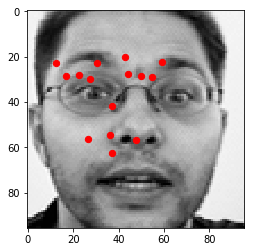

In [86]:

#Plotttig image with 2 points to verify
#im = plt.imread(image_name)
implot = plt.imshow(z[0].reshape((96,96)), cmap = 'gray')
plt.scatter(x=z_test.iloc[0,0:30:2], y=z_test.iloc[0,1:30:2], c='r', s=40)



# put a red dot, size 40, at 2 locations:



